<a href="https://colab.research.google.com/github/kylecata/kylecata/blob/main/Ckapter13(Homework4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import statistics as stat
import math
from scipy.stats import ttest_1samp
from statsmodels.stats import weightstats as stests
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn import linear_model
from scipy.stats import t
from scipy.stats import ttest_ind
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Hw13part1.csv to Hw13part1.csv
User uploaded file "Hw13part1.csv" with length 261 bytes


In [ ]:
import pandas as pd

df = pd.read_csv('Hw13part1.csv',sep = ',', na_values = ".")
df

,Order,a,b,c,totals
0,0,-1,-1,-1,221
1,1,1,-1,-1,325
2,2,-1,1,-1,354
3,3,1,1,-1,552
4,4,-1,-1,1,440
5,5,1,-1,1,406
6,6,-1,1,1,605
7,7,1,1,1,392
8,8,-1,-1,-1,311
9,9,1,-1,-1,435


In [ ]:
a = df[['a']].to_numpy()
b = df[['b']].to_numpy()
c = df[['c']].to_numpy()

In [ ]:
ab = a*b
df['ab'] = ab

In [ ]:
ac = a*c
df['ac'] = ac

In [ ]:
bc = c*b
df['bc'] = bc

In [ ]:
abc = a*b*c
df['abc'] = abc

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Order   16 non-null     int64
 1   a       16 non-null     int64
 2   b       16 non-null     int64
 3   c       16 non-null     int64
 4   totals  16 non-null     int64
 5   ab      16 non-null     int64
 6   ac      16 non-null     int64
 7   bc      16 non-null     int64
 8   abc     16 non-null     int64
dtypes: int64(9)
memory usage: 1.2 KB


In [ ]:
import statsmodels.api as sm
X = df[['a','b','c','ab','ac','bc','abc']]
X = sm.add_constant(X)
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,a,b,c,ab,ac,bc,abc
0,1.0,-1,-1,-1,1,1,1,-1
1,1.0,1,-1,-1,-1,-1,1,1
2,1.0,-1,1,-1,-1,1,-1,1
3,1.0,1,1,-1,1,-1,-1,-1
4,1.0,-1,-1,1,1,-1,-1,1
5,1.0,1,-1,1,-1,1,-1,-1
6,1.0,-1,1,1,-1,-1,1,-1
7,1.0,1,1,1,1,1,1,1
8,1.0,-1,-1,-1,1,1,1,-1
9,1.0,1,-1,-1,-1,-1,1,1


In [ ]:
Y = df[['totals',]]
Y

,totals
0,221
1,325
2,354
3,552
4,440
5,406
6,605
7,392
8,311
9,435


In [ ]:
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 totals   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     6.665
Date:                Mon, 03 Oct 2022   Prob (F-statistic):            0.00790
Time:                        12:28:28   Log-Likelihood:                -79.629
No. Observations:                  16   AIC:                             175.3
Df Residuals:                       8   BIC:                             181.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        413.1250     12.406     33.301      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [ ]:
residual1 = res.resid
residual1

0    -45.0
1    -55.0
2      3.0
3     40.0
4     -6.5
5     14.5
6     52.5
7    -13.5
8     45.0
9     55.0
10    -3.0
11   -40.0
12     6.5
13   -14.5
14   -52.5
15    13.5
dtype: float64

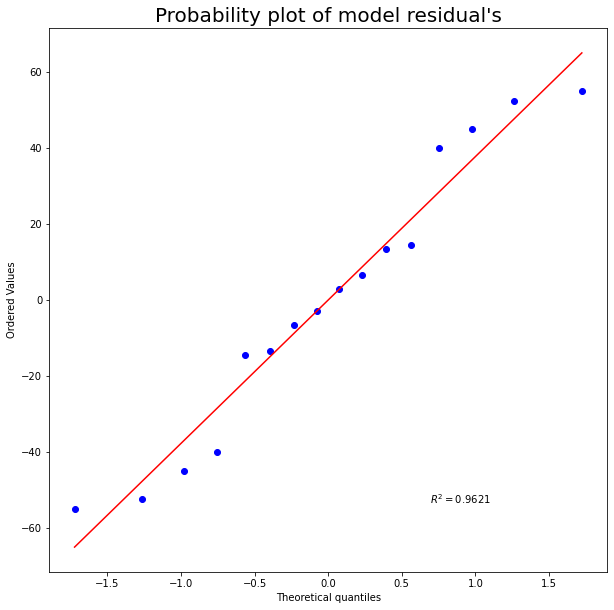

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [ ]:
stats.levene(df['totals'][df['a'] == -1],
             df['totals'][df['a'] == 1])

LeveneResult(statistic=2.9911667871195697, pvalue=0.10569523307659201)

In [ ]:
stats.levene(df['totals'][df['b'] == -1],
             df['totals'][df['b'] == 1])

LeveneResult(statistic=0.3721709444936149, pvalue=0.5515977352989001)

In [ ]:
stats.levene(df['totals'][df['c'] == -1],
             df['totals'][df['c'] == 1])

LeveneResult(statistic=0.6509474436896675, pvalue=0.43326735432278096)

In [ ]:
stats.levene(df['totals'][df['ab'] == -1],
             df['totals'][df['ab'] == 1])

LeveneResult(statistic=0.01357802057918744, pvalue=0.9088917080931298)

In [ ]:
stats.levene(df['totals'][df['ac'] == -1],
             df['totals'][df['ac'] == 1])

LeveneResult(statistic=0.3347168523993632, pvalue=0.572085178421951)

In [ ]:
stats.levene(df['totals'][df['bc'] == -1],
             df['totals'][df['bc'] == 1])

LeveneResult(statistic=1.4669667552470307, pvalue=0.24587388037751523)

In [ ]:
stats.levene(df['totals'][df['abc'] == -1],
             df['totals'][df['abc'] == 1])

LeveneResult(statistic=5.934828492253794, pvalue=0.028800646584476793)

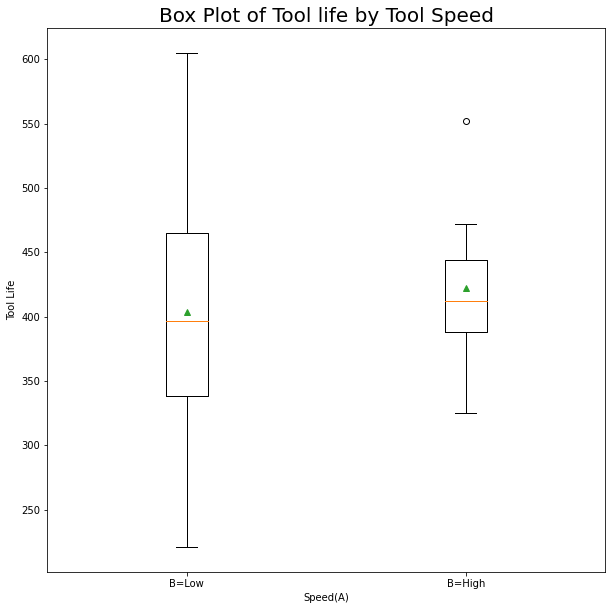

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Tool life by Tool Speed", fontsize= 20)
ax.set

data2 = [df['totals'][df['a'] == -1],
         df['totals'][df['a'] == +1]]


ax.boxplot(data2,
           labels= ['B=Low', 'B=High'],
           showmeans= True)

plt.xlabel("Speed(A)")
plt.ylabel("Tool Life")

plt.show()

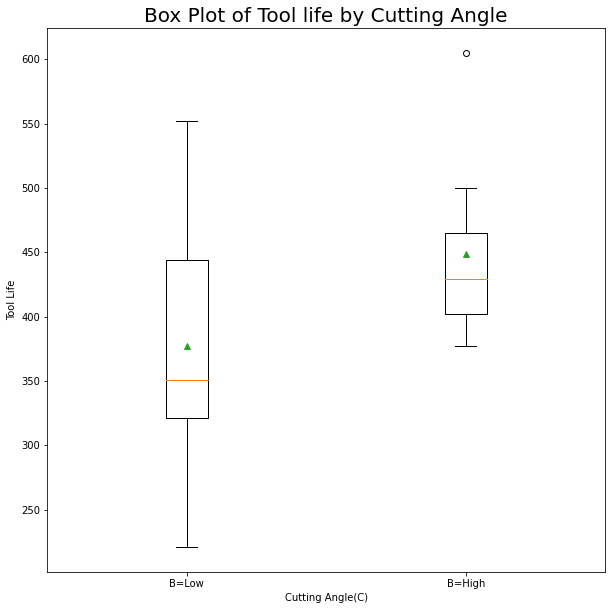

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Tool life by Cutting Angle", fontsize= 20)
ax.set

data2 = [df['totals'][df['c'] == -1],
         df['totals'][df['c'] == +1]]


ax.boxplot(data2,
           labels= ['B=Low', 'B=High'],
           showmeans= True)

plt.xlabel("Cutting Angle(C)")
plt.ylabel("Tool Life")

plt.show()

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Hw13part2.csv to Hw13part2.csv
User uploaded file "Hw13part2.csv" with length 605 bytes


In [ ]:
import pandas as pd

df2 = pd.read_csv('Hw13part2.csv',sep = ',', na_values = ".")
df2

,Factors,a,b,c,d,total
0,1,-1,-1,-1,-1,188
1,a,1,-1,-1,-1,172
2,b,-1,1,-1,-1,179
3,ab,1,1,-1,-1,185
4,c,-1,-1,1,-1,175
5,ac,1,-1,1,-1,183
6,bc,-1,1,-1,-1,190
7,abc,1,1,1,-1,175
8,d,-1,-1,-1,1,200
9,ad,1,-1,-1,1,170


In [ ]:
a = df2[['a']].to_numpy()
b = df2[['b']].to_numpy()
c = df2[['c']].to_numpy()
d = df2[['d']].to_numpy()

In [ ]:
ab = a*b
df2['ab'] = ab

In [ ]:
ac = a*c
df2['ac'] = ac

In [ ]:
ad = a*d
df2['ad'] = ad

In [ ]:
bc = b*c
df2['bc'] = bc

In [ ]:
bd = b*d
df2['bd'] = bd

In [ ]:
cd = c*d
df2['cd'] = cd

In [ ]:
abc = a*b*c
df2['abc'] = abc

In [ ]:
bcd = b*c*d
df2['bcd'] = bcd

In [ ]:
abd = a*b*d
df2['abd'] = abd

In [ ]:
abcd = a*b*c*d
df2['abcd'] = abcd

In [ ]:
X = df2[['a',	'b',	'c',	'ab',	'ac',	'bc',	'abc', 'ad', 'bd', 'cd', 'abcd', 'bcd', 'abd']]
X= sm.add_constant(X)
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,a,b,c,ab,ac,bc,abc,ad,bd,cd,abcd,bcd,abd
0,1.0,-1,-1,-1,1,1,1,-1,1,1,1,1,-1,-1
1,1.0,1,-1,-1,-1,-1,1,1,-1,1,1,-1,-1,1
2,1.0,-1,1,-1,-1,1,-1,1,1,-1,1,-1,1,1
3,1.0,1,1,-1,1,-1,-1,-1,-1,-1,1,1,1,-1
4,1.0,-1,-1,1,1,-1,-1,1,1,1,-1,-1,1,-1
5,1.0,1,-1,1,-1,1,-1,-1,-1,1,-1,1,1,1
6,1.0,-1,1,-1,-1,1,-1,1,1,-1,1,-1,1,1
7,1.0,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1
8,1.0,-1,-1,-1,1,1,1,-1,-1,-1,-1,-1,1,1
9,1.0,1,-1,-1,-1,-1,1,1,1,-1,-1,1,1,-1


In [ ]:
Y = df2[['total',]]
Y

,total
0,188
1,172
2,179
3,185
4,175
5,183
6,190
7,175
8,200
9,170


In [ ]:
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     3.134
Date:                Mon, 03 Oct 2022   Prob (F-statistic):             0.0132
Time:                        12:55:28   Log-Likelihood:                -92.383
No. Observations:                  32   AIC:                             212.8
Df Residuals:                      18   BIC:                             233.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        182.7585      1.040    175.684      0.0

In [ ]:
residual2 = res.resid
residual2

0    -4.760870
1    -6.722222
2    -7.173913
3     0.777778
4    -5.222222
5     1.239130
6     3.826087
7     2.239130
8     4.760870
9    -1.277778
10    5.260870
11    0.222222
12    9.222222
13    5.260870
14    6.222222
15   -0.739130
16    2.239130
17    1.277778
18    0.826087
19   -6.222222
20   -0.222222
21   -3.760870
22   -5.444444
23   -4.760870
24   -2.239130
25    6.722222
26   -2.739130
27    5.222222
28   -3.777778
29   -2.739130
30   -0.777778
31    3.260870
dtype: float64

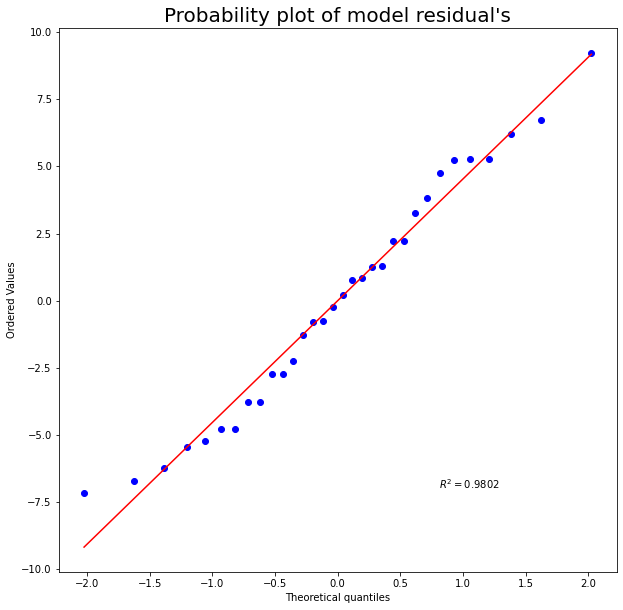

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()